## Question-1

In [2]:
# Step 1: Import the necessary libraries
import pandas as pd

In [3]:
# Step 2: Load the dataset from a local file
file_path = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(file_path, sep='|')

In [4]:
# Step 3: Assign it to a variable called `users`
print(users.head())


   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213


In [5]:
# Step 4: Discover the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("Mean Age per Occupation:\n", mean_age_per_occupation)

Mean Age per Occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [6]:
# Step 5: Discover the Male ratio per occupation and sort it from most to least
# Calculate the male ratio
users['is_male'] = users['gender'].apply(lambda x: 1 if x == 'M' else 0)
male_ratio_per_occupation = users.groupby('occupation')['is_male'].mean().sort_values(ascending=False)
print("\nMale Ratio per Occupation:\n", male_ratio_per_occupation)


Male Ratio per Occupation:
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: is_male, dtype: float64


In [7]:
# Step 6: Calculate the minimum and maximum ages for each occupation
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("\nMinimum and Maximum Age per Occupation:\n", min_max_age_per_occupation)


Minimum and Maximum Age per Occupation:
                min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [8]:
# Step 7: For each combination of occupation and sex, calculate the mean age
mean_age_per_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean()
print("\nMean Age per Occupation and Gender:\n", mean_age_per_occupation_gender)


Mean Age per Occupation and Gender:
 occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.02

In [9]:
# Step 8: Present the percentage of women and men for each occupation
gender_counts_per_occupation = users.groupby(['occupation', 'gender']).size().unstack()
gender_percentage_per_occupation = gender_counts_per_occupation.div(gender_counts_per_occupation.sum(axis=1), axis=0) * 100
print("\nPercentage of Women and Men per Occupation:\n", gender_percentage_per_occupation)


Percentage of Women and Men per Occupation:
 gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor               NaN  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


---

## Question-2


In [10]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 1: Import the dataset from this address
file_path = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"  

# Step 2: Assign it to a variable called euro12
euro12 = pd.read_csv(file_path, sep=',')  
euro12.columns = euro12.columns.str.strip()

print("Columns in dataset:", euro12.columns)
print(euro12.head())


Columns in dataset: Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')
             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         E

In [11]:
# Step 4: Select only the 'Goals' column
goal = euro12['Goals']
print(goal.head())  # Print the first few values of the Goals column


0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64


In [12]:
# Step 5: How many teams participated in Euro 2012?
num_teams = euro12['Team'].nunique()
print(f'Number of teams that participated in Euro 2012: {num_teams}')


Number of teams that participated in Euro 2012: 16


In [13]:
# Step 6: Number of columns in the dataset
num_columns = euro12.shape[1]
print(f'Number of columns in the dataset: {num_columns}')


Number of columns in the dataset: 35


In [14]:
# Step 7: View only 'Team', 'Yellow Cards', and 'Red Cards' and assign to 'discipline'
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline.head())  # Print the first few rows of the discipline dataframe


             Team  Yellow Cards  Red Cards
0         Croatia             9          0
1  Czech Republic             7          0
2         Denmark             4          0
3         England             5          0
4          France             6          0


In [15]:
# Step 8: Sort by 'Red Cards' first, then by 'Yellow Cards'
sorted_teams = euro12.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
print(sorted_teams[['Team', 'Red Cards', 'Yellow Cards']].head())


                   Team  Red Cards  Yellow Cards
6                Greece          1             9
9                Poland          1             7
11  Republic of Ireland          1             6
7                 Italy          0            16
10             Portugal          0            12


In [16]:

# Step 9: Calculate the mean Yellow Cards per team
mean_yellow_cards = euro12['Yellow Cards'].mean()
print(f'Mean Yellow Cards per team: {mean_yellow_cards}')


Mean Yellow Cards per team: 7.4375


In [17]:
# Step 10: Filter teams that scored more than 6 goals
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
print(teams_more_than_6_goals[['Team', 'Goals']])


       Team  Goals
5   Germany     10
13    Spain     12


In [18]:
# Step 11: Select teams that start with 'G'
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]
print(teams_starting_with_G[['Team']])


      Team
5  Germany
6   Greece


In [19]:
# Step 12: Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print(first_7_columns.head())


             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  
0            16.0%                          32  
1            12.9%                          39  
2            20.0%                          27  
3            17.2%                          40  
4             6.5%                          65  


In [20]:
# Step 13: Select all columns except the last 3
columns_except_last_3 = euro12.iloc[:, :-3]
print(columns_except_last_3.head())


             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
0            16.0%                          32             0              0   
1            12.9%                          39             0              0   
2            20.0%                          27             1              0   
3            17.2%                          40             0              0   
4             6.5%                          65             1              0   

   Penalties not scored  ...  Clean Sh

In [21]:
# Step 14: Present only 'Shooting Accuracy' from England, Italy, and Russia
teams_of_interest = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])]
shooting_accuracy = teams_of_interest[['Team', 'Shooting Accuracy']]
print(shooting_accuracy)


       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


---

## Question-3

In [22]:
# step-1 Import the necessary libraries
import pandas as pd
import numpy as np

In [23]:
# Step-2  Create 3 differents Series, each of length 100, as follows:
#          • The first a random number from 1 to 4
#          • The second a random number from 1 to 3
#          • The third a random number from 10,000 to 30,000 
s1 = pd.Series(np.random.randint(1, 5, size=100))  # Random numbers from 1 to 4
s2 = pd.Series(np.random.randint(1, 4, size=100))  # Random numbers from 1 to 3
s3 = pd.Series(np.random.randint(10000, 30001, size=100))  # Random numbers from 10,000 to 30,000

In [24]:
# Step-3 Create a DataFrame by joinning the Series by column
dn = pd.concat([s1, s2, s3], axis=1)

In [25]:
# Step-4 Change the name of the columns to bedrs, bathrs, price_sqr_meter
dn.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

In [26]:
# Step-5 Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn
bigcolumn = pd.DataFrame(pd.concat([s1, s2, s3]))
print(bigcolumn.index)


Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype='int64', length=300)


In [27]:
# step-6 Ops it seems it is going only until index 99. Is it true?

Yes, it is true.

In [28]:
# Step-7 Reindex the DataFrame so it goes from 0 to 299

bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn = bigcolumn.reindex(range(300))
print(bigcolumn)


         0
0        2
1        4
2        2
3        2
4        1
..     ...
295  20753
296  25813
297  17176
298  25150
299  18123

[300 rows x 1 columns]


----

## Question-4

In [29]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

In [30]:
# Step 2: Import the dataset from the file
file_path = 'wind.txt'  # Adjusted to the correct file path
data = pd.read_csv(file_path, delim_whitespace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19228\121372192.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True)


FileNotFoundError: [Errno 2] No such file or directory: 'wind.txt'

In [ ]:
# Step 3: Replace the first 3 columns with a proper datetime index
data.columns = ['Yr', 'Mo', 'Dy'] + list(data.columns[3:])
data['Yr'] = data['Yr'].apply(lambda x: x + 1900 if x < 100 else x)  # Adjust years
data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1))
data.set_index('Date', inplace=True)


In [ ]:
# Step 4: Fix the year if it is incorrectly set to 2061
def fix_year(year):
    return year - 100 if year > 2023 else year

data.index = data.index.map(lambda date: date.replace(year=fix_year(date.year)))

In [ ]:
# Step 5: Ensure the index is datetime64[ns]
data.index = pd.to_datetime(data.index)

In [ ]:
# Step 6: Compute how many values are missing for each location
missing_values = data.isna().sum()

In [ ]:
# Step 7: Compute the total number of non-missing values
non_missing_values = data.notna().sum().sum()

In [ ]:
# Step 8: Calculate the mean windspeeds over all locations and all times
mean_windspeed = data.mean().mean()

In [ ]:
# Step 9: Create `loc_stats` DataFrame for statistics by location
loc_stats = data.describe().loc[['min', 'max', 'mean', 'std']].transpose()

In [ ]:
# Step 10: Create `day_stats` DataFrame for statistics by day
day_stats = data.aggregate(['min', 'max', 'mean', 'std'], axis=1)

In [ ]:
# Step 11: Find the average windspeed in January for each location
january_data = data[data.index.month == 1]
january_avg = january_data.mean()


In [ ]:
# Step 12: Downsample the record to a yearly frequency for each location
yearly_data = data.resample('Y').mean()


In [ ]:
# Step 13: Downsample the record to a monthly frequency for each location
monthly_data = data.resample('M').mean()

In [ ]:
# Step 14: Downsample the record to a weekly frequency for each location
weekly_data = data.resample('W').mean()

In [ ]:
# Step 15: Calculate weekly statistics for the first 52 weeks
weekly_stats = data.resample('W').aggregate(['min', 'max', 'mean', 'std']).iloc[:52]

# Display key results
print("Missing values per location:")
print(missing_values)

print("\nTotal number of non-missing values:")
print(non_missing_values)

print("\nMean windspeed across all locations and times:")
print(mean_windspeed)

print("\nStatistics by location:")
print(loc_stats)

print("\nAverage windspeed in January for each location:")
print(january_avg)

print("\nYearly downsampled data:")
print(yearly_data)

print("\nMonthly downsampled data:")
print(monthly_data)

print("\nWeekly downsampled data:")
print(weekly_data)

print("\nWeekly statistics for the first 52 weeks:")
print(weekly_stats)

Missing values per location:
Yr     0
Mo     0
Dy     0
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total number of non-missing values:
98579

Mean windspeed across all locations and times:
140.96586626591318

Statistics by location:
         min      max         mean       std
Yr   1961.00  1978.00  1969.500304  5.188131
Mo      1.00    12.00     6.523274  3.448871
Dy      1.00    31.00    15.728628  8.800335
RPT     0.67    35.80    12.362987  5.618413
VAL     0.21    33.37    10.644314  5.267356
ROS     1.50    33.84    11.660526  5.008450
KIL     0.00    28.46     6.306468  3.605811
SHA     0.13    37.54    10.455834  4.936125
BIR     0.00    26.16     7.092254  3.968683
DUB     0.00    30.37     9.797343  4.977555
CLA     0.00    31.08     8.495053  4.499449
MUL     0.00    25.88     8.493590  4.166872
CLO     0.04    28.21     8.707332  4.503954
BEL     0.13    42.38    13.121007  5.835037
MAL     0.67 

---

## Question-5

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

# Specify the correct path to your local TXT file
file_path = 'C:\\Users\\tarak\\Downloads\\ps1\\que 5.txt'  # Windows
# file_path = 'C:\Users\tarak\Downloads\ps1\que 5.txt'  # Mac/Linux

# Load the data from the local file (assuming tab-separated values)
chipo = pd.read_table(file_path, delimiter='\t')

# Check the first few rows to confirm it loaded correctly
print(chipo.head())


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   


In [ ]:
chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


---

In [ ]:
len(chipo)


4622

In [ ]:
chipo.shape[1]



5

In [ ]:
chipo.columns


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [ ]:
chipo.index


RangeIndex(start=0, stop=4622, step=1)

In [ ]:
most_ordered_item = chipo.groupby('item_name').sum()['quantity'].idxmax()
most_ordered_item


C:\Users\tarak\AppData\Local\Temp\ipykernel_20672\3365998343.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_ordered_item = chipo.groupby('item_name').sum()['quantity'].idxmax()


'Chicken Bowl'

In [ ]:
most_ordered_item_quantity = chipo.groupby('item_name').sum()['quantity'].max()
most_ordered_item_quantity


C:\Users\tarak\AppData\Local\Temp\ipykernel_20672\299017490.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_ordered_item_quantity = chipo.groupby('item_name').sum()['quantity'].max()


761

In [ ]:
most_ordered_choice_description = chipo.groupby('choice_description').sum()['quantity'].idxmax()
most_ordered_choice_description


C:\Users\tarak\AppData\Local\Temp\ipykernel_20672\3616757939.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_ordered_choice_description = chipo.groupby('choice_description').sum()['quantity'].idxmax()


'[Diet Coke]'

In [ ]:
total_items_ordered = chipo['quantity'].sum()
total_items_ordered


4972

In [ ]:
chipo['item_price'] = chipo['item_price'].replace({'\$': ''}, regex=True).astype(float)
chipo['item_price'].dtype
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))
chipo['item_price'].dtype


dtype('float64')

In [ ]:
chipo['revenue'] = chipo['item_price'] * chipo['quantity']
total_revenue = chipo['revenue'].sum()
total_revenue


39237.02

In [ ]:
num_orders = chipo['order_id'].nunique()
num_orders


1834

In [ ]:
avg_revenue_per_order = chipo.groupby('order_id')['revenue'].sum().mean()
avg_revenue_per_order


21.39423118865867

In [ ]:
num_different_items = chipo['item_name'].nunique()
num_different_items


50

---

## Question-6


In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load the dataset
# Replace 'us-marriages-divorces-1867-2014' with your file containing marriage and divorce data
file_path = 'us-marriages-divorces-1867-2014.csv'  # Adjust this path
data = pd.read_csv(file_path)

In [ ]:
# Step 3: Ensure the data has necessary columns
# Assuming the dataset has columns 'Year', 'Marriages_per_Capita', 'Divorces_per_Capita'
# Adjust column names if necessary
data['Year'] = pd.to_datetime(data['Year'], format='%Y')  # Ensure Year column is datetime


In [ ]:
# Step 4: Plot the data
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Step 4: Plot the data
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


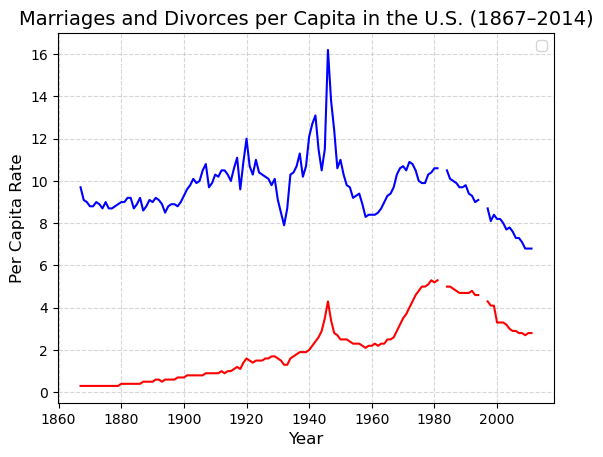

In [ ]:
# Step 5: Add labels, title, and legend
plt.title('Marriages and Divorces per Capita in the U.S. (1867–2014)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Per Capita Rate', fontsize=12)
plt.legend(fontsize=10)
# Step 6: Customize the plot
plt.grid(True, linestyle='--', alpha=0.5)
# Plot marriages per capita
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000', color='blue')# Plot divorces per capita
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000', color='red')
# Show the plot
plt.show()

---


## Question-7

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Step 2: Load the dataset
# Replace 'us-marriages-divorces-1867-2014.csv' with the actual file path
file_path = 'us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)

In [ ]:
# Step 3: Check the column names and ensure consistency
data.rename(columns={
    'Marriages per 1000': 'Marriages_per_1000',
    'Divorces per 1000': 'Divorces_per_1000'
}, inplace=True)

In [ ]:
# Step 4: Filter the data for 1900, 1950, and 2000
filtered_data = data[data['Year'].isin([1900, 1950, 2000])]

In [ ]:
# Step 5: Plot the bar chart
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

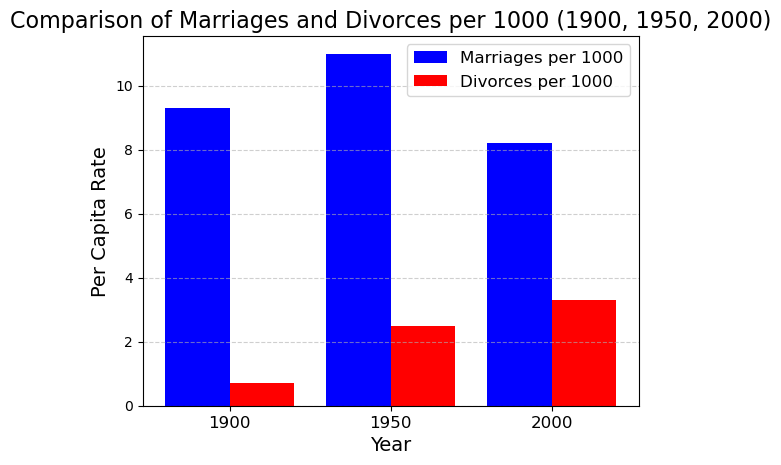

In [ ]:
# Define the positions for the bars
x_positions = [0, 1, 2]  # Corresponding to 1900, 1950, and 2000
bar_width = 0.4  # Width of the bars

# Plot marriages per capita
plt.bar(
    [x - bar_width / 2 for x in x_positions], 
    filtered_data['Marriages_per_1000'], 
    width=bar_width, 
    label='Marriages per 1000', 
    color='blue'
)

# Plot divorces per capita
plt.bar(
    [x + bar_width / 2 for x in x_positions], 
    filtered_data['Divorces_per_1000'], 
    width=bar_width, 
    label='Divorces per 1000', 
    color='red'
)

# Step 6: Customize the chart
plt.xticks(x_positions, ['1900', '1950', '2000'], fontsize=12)  # Set x-axis labels
plt.xlabel('Year', fontsize=14)
plt.ylabel('Per Capita Rate', fontsize=14)
plt.title('Comparison of Marriages and Divorces per 1000 (1900, 1950, 2000)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Step 7: Show the plot
plt.show()

---

## Question-8

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Create a dataset of actors and their kill counts
# Replace this with your actual dataset if available
data = pd.DataFrame({
    'Actor': ['Sylvester Stallone', 'Arnold Schwarzenegger', 'Bruce Willis', 'Keanu Reeves', 'Liam Neeson'],
    'Count': [450, 380, 300, 270, 250]
})

In [ ]:
# Step 3: Sort the data by kill count in descending order
data = data.sort_values(by='Count', ascending=False)

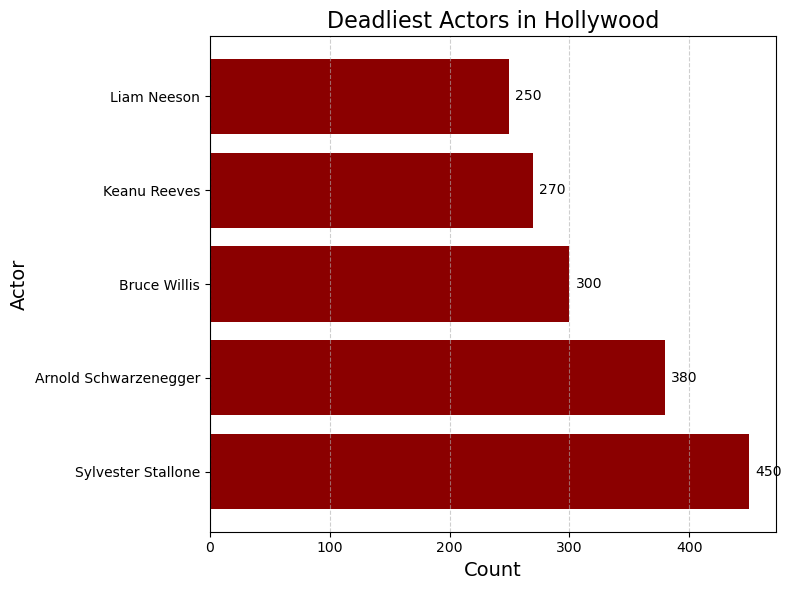

In [ ]:

# Step 4: Plot the horizontal bar chart
plt.figure(figsize=(8, 6))  # Adjusted figure size
plt.barh(data['Actor'], data['Count'], color='darkred')
# Step 5: Customize the chart
plt.xlabel('Count', fontsize=14)
plt.ylabel('Actor', fontsize=14)
plt.title('Deadliest Actors in Hollywood', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.6)
# Annotate bars with counts
for index, value in enumerate(data['Count']):
    plt.text(value + 5, index, str(value), va='center', fontsize=10)
    # Step 6: Adjust layout
plt.tight_layout()
# Step 7: Show the plot
plt.show()

---

## Question-9

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Create a dataset of Roman Emperors
# Replace this with your actual dataset if available
data = pd.DataFrame({
    'Category': ['Assassinated', 'Other Causes'],
    'Count': [50, 100]  # Replace with the actual counts
})

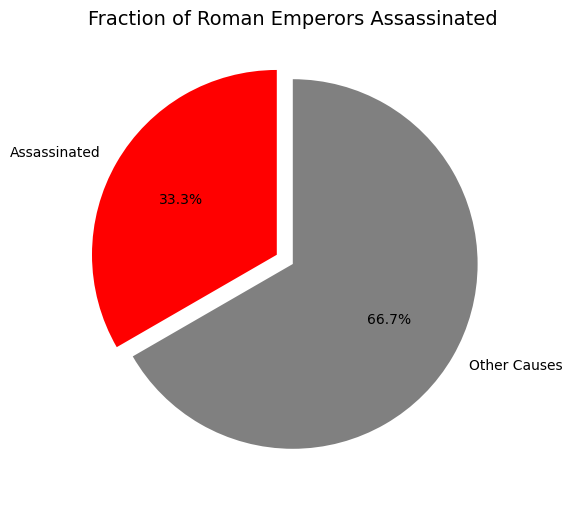

In [ ]:
# Step 3: Plot the pie chart
plt.figure(figsize=(6, 6))  # Ensure the pie chart is a circle
plt.pie(
    data['Count'], 
    labels=data['Category'], 
    autopct='%1.1f%%',  # Display percentages
    startangle=90,  # Rotate the chart for better readability
    colors=['red', 'gray'],  # Optional: Assign colors to categories
    explode=(0.1, 0)  # Optional: Offset the "Assassinated" slice
)
# Step 4: Add a title
plt.title('Fraction of Roman Emperors Assassinated', fontsize=14)

# Step 5: Show the chart
plt.show()

---

## Question-10

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Create a dataset
# Replace this with your actual dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
    'Arcade_Revenue': [1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7],  # Revenue in billions
    'CS_PhDs': [800, 850, 870, 890, 910, 950, 980, 1000, 1050, 1100]  # Number of CS PhDs
})


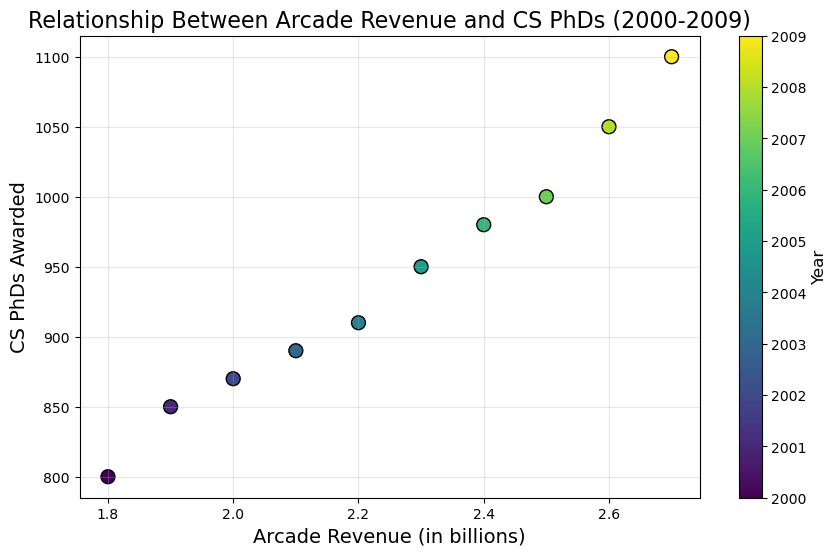

In [ ]:
# Step 3: Plot the scatter plot
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    data['Arcade_Revenue'], 
    data['CS_PhDs'], 
    c=data['Year'],  # Use year for color
    cmap='viridis',  # Color map for years
    edgecolor='k',  # Black edge for better visibility
    s=100  # Size of the dots
)
# Step 4: Add labels and title
plt.title('Relationship Between Arcade Revenue and CS PhDs (2000-2009)', fontsize=16)
plt.xlabel('Arcade Revenue (in billions)', fontsize=14)
plt.ylabel('CS PhDs Awarded', fontsize=14)

# Add color bar for the year
cbar = plt.colorbar(scatter)
cbar.set_label('Year', fontsize=12)

# Step 5: Show the plot
plt.grid(alpha=0.3)
plt.show()